In [9]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import cmocean

In [10]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc')
data = xr.open_dataset(dataset)

In [11]:
lats = data.variables['nav_lat'][:]
lons = data.variables['nav_lon'][:]
time = data.variables['time_counter'][:]
co2flux = data.variables['co2flux_cpl'][:]

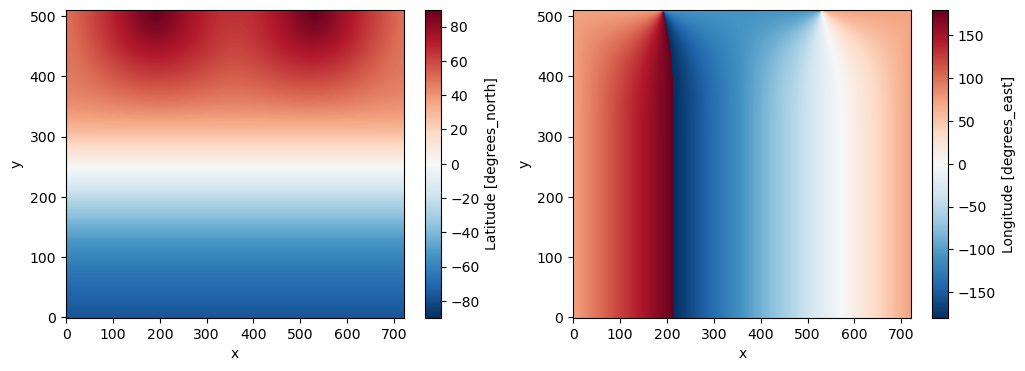

In [12]:
# plot coordinates

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
data.nav_lat.plot(ax=ax1)
data.nav_lon.plot(ax=ax2)

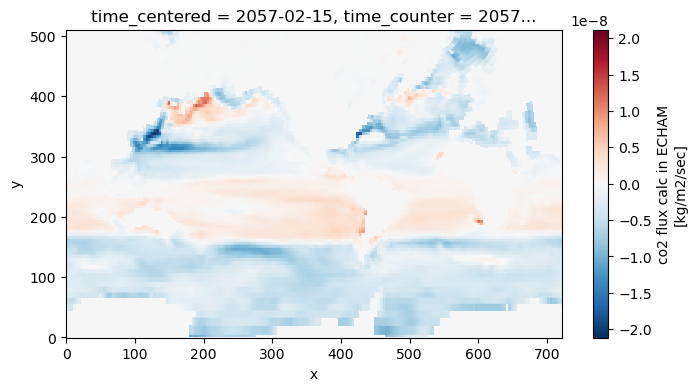

In [13]:
# plot world map at time point [x]
data.co2flux_cpl[505].plot(figsize = (8, 4))

# in alternative
# plt.figure(figsize = (10, 6))
# data.co2flux_cpl[1010].plot()

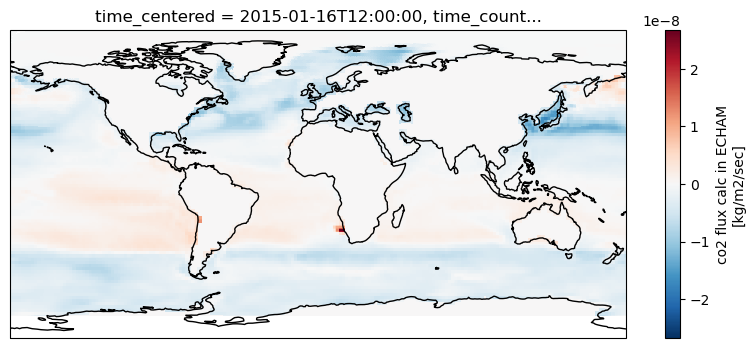

In [14]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
data.co2flux_cpl[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)
ax.coastlines()
ax.set_global()

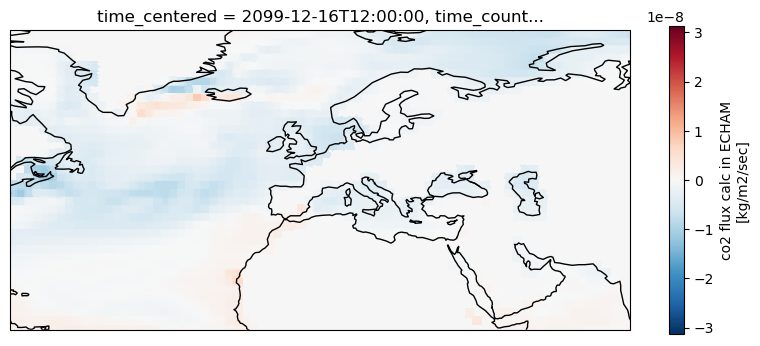

In [15]:
# visualise the data with cartopy

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
data.co2flux_cpl[1019].plot.pcolormesh( # [] to select a month
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True
)
ax.coastlines()
ax.set_extent([75, -70, 10, 60]) # plot a region

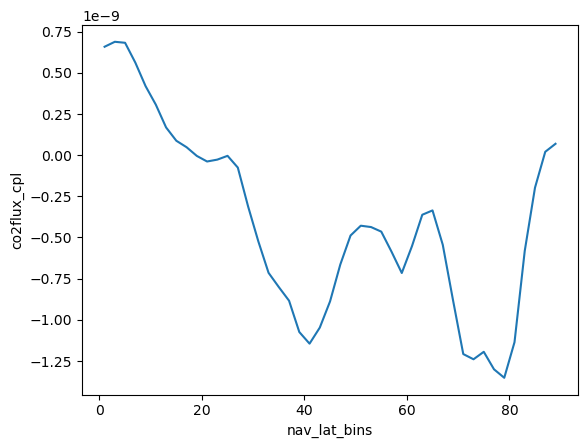

In [16]:
# calculate the mean CO2 flux at each latitude

lat_bins = np.arange(0, 91, 2) # define two-degree wide latitude bins

lat_center = np.arange(1, 90, 2) # define a label for each bin corresponding to the central latitude

CO2flux_mean = data.co2flux_cpl.groupby_bins("nav_lat", lat_bins, labels=lat_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

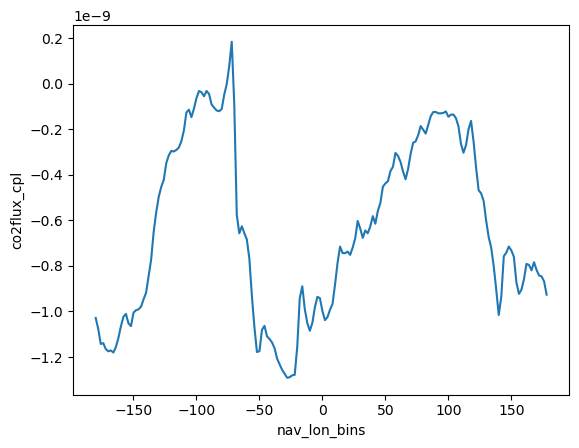

In [17]:
# calculate the mean CO2 flux at each longitude

lon_bins = np.arange(-181, 181, 2) # define two-degree wide latitude bins

lon_center = np.arange(-180, 180, 2) # define a label for each bin corresponding to the central latitude

CO2flux_mean = data.co2flux_cpl.groupby_bins("nav_lon", lon_bins, labels=lon_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

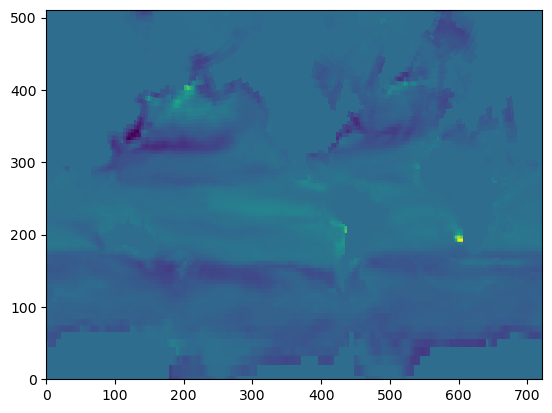

In [18]:
# plot data at time 0

plt.figure()
plt.pcolor(co2flux[1019,:,:])

In [19]:
ds_date_range = data.sel(time_counter=slice('2089', '2099')) # select a time range

In [20]:
df = ds_date_range.to_dataframe() # export data as Pandas dataframe 

In [21]:
df.head() # first lines of new dataframe

nav_lat  nav_lon       time_centered  \
y x time_counter        axis_nbounds                                           
0 0 2089-01-16 12:00:00 0            -77.010475    72.75 2089-01-16 12:00:00   
                        1            -77.010475    72.75 2089-01-16 12:00:00   
    2089-02-15 00:00:00 0            -77.010475    72.75 2089-02-15 00:00:00   
                        1            -77.010475    72.75 2089-02-15 00:00:00   
    2089-03-16 12:00:00 0            -77.010475    72.75 2089-03-16 12:00:00   

                                     time_centered_bounds time_counter_bounds  \
y x time_counter        axis_nbounds                                            
0 0 2089-01-16 12:00:00 0                      2089-01-01          2089-01-01   
                        1                      2089-02-01          2089-02-01   
    2089-02-15 00:00:00 0                      2089-02-01          2089-02-01   
                        1                      2089-03-01          2089-03-01   
    2089-03-16 12:00:00 0                      2089-03-01          2089-03-01   

                                      co2flux_cpl  
y x time_counter        axis_nbounds               
0 0 2089-01-16 12:00:00 0                     0.0  
                        1                     0.0  
    2089-02-15 00:00:00 0                     0.0  
                        1                     0.0  
    2089-03-16 12:00:00 0                     0.0

In [22]:
df.describe() # describe the data 

,nav_lat,nav_lon,co2flux_cpl
count,9.740069e+07,9.740069e+07,9.740069e+07
mean,5.173821e-01,-1.020416e+00,-3.488421e-10
std,5.207631e+01,1.025694e+02,2.129199e-09
min,-7.701048e+01,-1.799970e+02,-2.192818e-08
25%,-5.194667e+01,-9.518312e+01,-1.155809e-09
50%,2.998630e+00,2.482575e+00,0.000000e+00
75%,5.047917e+01,8.425000e+01,2.529922e-10
max,8.988536e+01,1.799988e+02,4.110115e-08


In [23]:
ds_date_range.co2flux_cpl.mean(dim=('y', 'x')) # time_counter as x months for the selected timeframe

<xarray.DataArray 'co2flux_cpl' (time_counter: 132)>
array([-1.10178868e-09, -1.00566533e-09, -8.15105323e-10, -5.66538218e-10,
       -3.25788988e-10,  6.18898880e-12,  2.31224381e-10,  4.49625383e-10,
        3.31501414e-10,  8.81707831e-11, -5.70301241e-10, -1.05746158e-09,
       -1.07451822e-09, -1.00601841e-09, -8.86856293e-10, -5.68563851e-10,
       -3.40895126e-10, -7.62713311e-11,  2.45686484e-10,  3.97177163e-10,
        4.21753832e-10,  7.16831879e-11, -6.55246513e-10, -1.01696377e-09,
       -1.02282202e-09, -1.05308118e-09, -7.88706503e-10, -6.47008669e-10,
       -3.50317706e-10,  1.62611297e-11,  2.51678598e-10,  4.15503505e-10,
        4.10647549e-10,  1.72281024e-12, -5.43616175e-10, -1.08471139e-09,
       -1.04202510e-09, -1.08822485e-09, -8.11214839e-10, -5.57230792e-10,
       -3.14549771e-10, -4.23387483e-11,  1.93118182e-10,  4.32907964e-10,
        3.19332823e-10,  1.37167176e-12, -5.99672809e-10, -9.78267332e-10,
       -1.09827928e-09, -1.03126836e-09, -8.02277417e-10, -4.81929126e-10,
       -2.67202819e-10, -4.93036226e-11,  2.20876833e-10,  3.84514018e-10,
        4.44261831e-10,  5.41614267e-11, -5.83936386e-10, -9.76498036e-10,
       -1.06675938e-09, -1.02224383e-09, -7.91277845e-10, -5.42877559e-10,
       -3.30869443e-10, -6.01671799e-11,  2.53978036e-10,  5.05041989e-10,
        5.16795294e-10,  1.27504886e-10, -5.31791066e-10, -9.36276929e-10,
       -9.92954596e-10, -1.08087086e-09, -7.79136785e-10, -5.55967789e-10,
       -3.54384563e-10, -1.35542814e-11,  2.35310394e-10,  4.55513944e-10,
        4.28824551e-10,  2.82196821e-11, -6.32617454e-10, -1.06757996e-09,
       -1.13442590e-09, -1.00915895e-09, -8.57621261e-10, -5.39516855e-10,
       -3.22293432e-10, -5.26658734e-11,  2.96324004e-10,  4.87742012e-10,
        4.94974330e-10,  9.06834686e-11, -5.77816845e-10, -9.87476374e-10,
       -9.82378223e-10, -9.71694938e-10, -8.36032004e-10, -5.31753937e-10,
       -3.10672760e-10, -3.96014325e-11,  1.65754889e-10,  3.14241031e-10,
        3.62040839e-10,  1.31249204e-10, -5.69382859e-10, -9.74543182e-10,
       -1.02083552e-09, -9.60386183e-10, -7.71974817e-10, -5.58728877e-10,
       -2.90514337e-10, -1.60032115e-10,  2.34986473e-10,  5.31447233e-10,
        4.15204153e-10,  1.05847044e-10, -4.85781148e-10, -9.47860253e-10,
       -9.21538314e-10, -9.46817135e-10, -7.21579226e-10, -5.29610406e-10,
       -2.65795059e-10,  5.19567115e-12,  3.14634545e-10,  5.01231530e-10,
        3.89458534e-10,  1.48135258e-11, -5.49937216e-10, -9.73323505e-10])
Coordinates:
    time_centered  (time_counter) datetime64[ns] 2089-01-16T12:00:00 ... 2099...
  * time_counter   (time_counter) datetime64[ns] 2089-01-16T12:00:00 ... 2099...

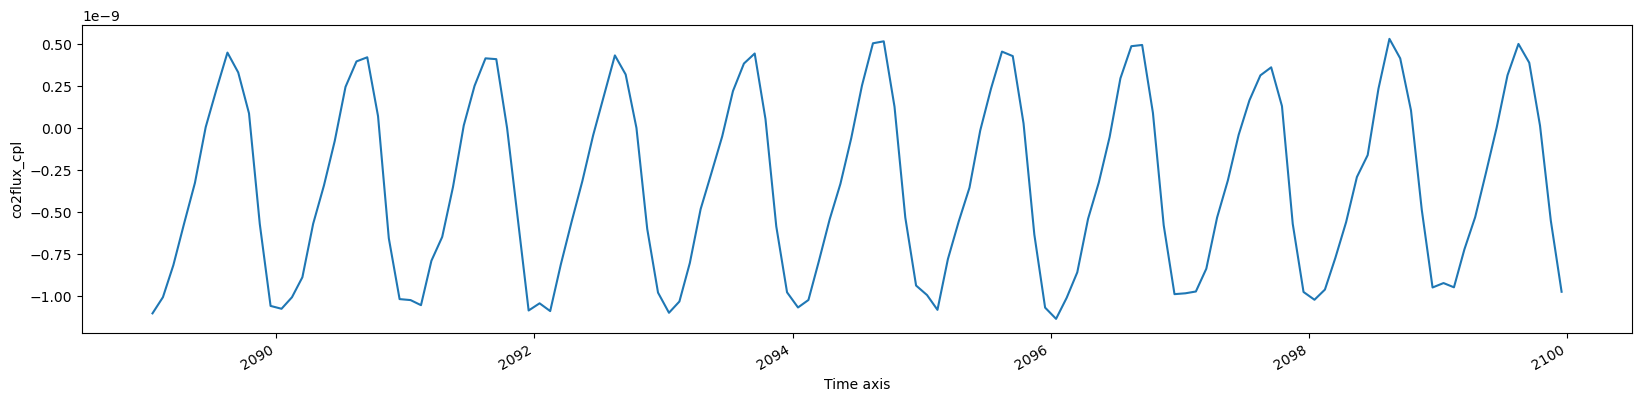

In [24]:
ds_date_range.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean 

In [25]:
mean_array = ds_date_range.mean(dim='time_counter') # mean time
mean_array.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:      (y: 511, x: 722)
Coordinates:
    nav_lat      (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.07 50.0 50.0
    nav_lon      (y, x) float32 72.75 73.25 73.75 74.25 ... 73.01 73.0 73.0
Dimensions without coordinates: y, x
Data variables:
    co2flux_cpl  (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0>

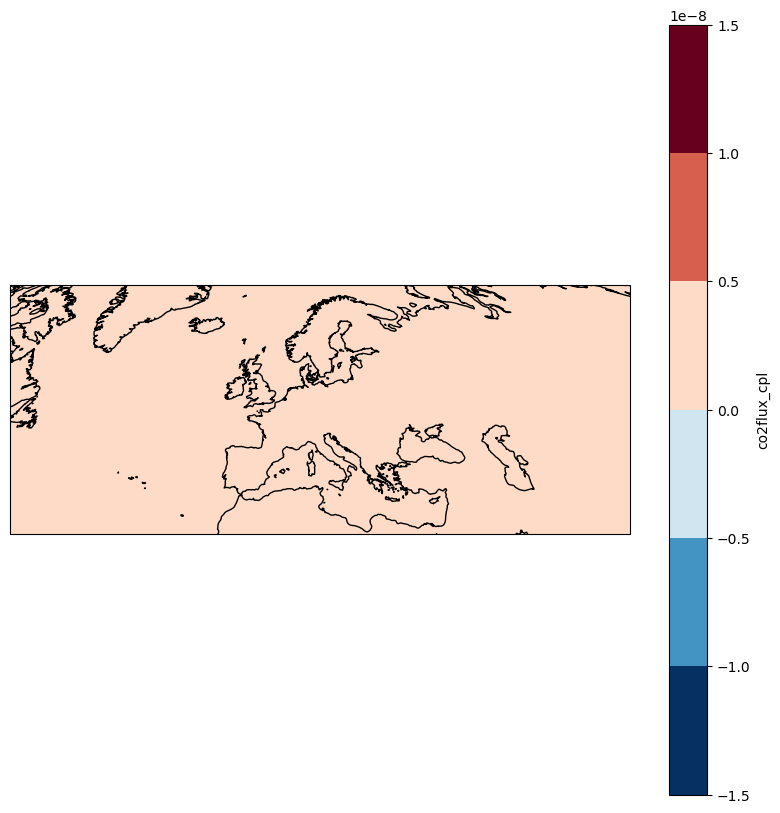

In [26]:
fig=plt.figure(figsize=(10,10), frameon=True) 

ax = plt.axes(projection=ccrs.Mollweide())
mean_array.co2flux_cpl.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.coastlines(); ax.set_extent([70, -50, 30, 60]) # plot a region

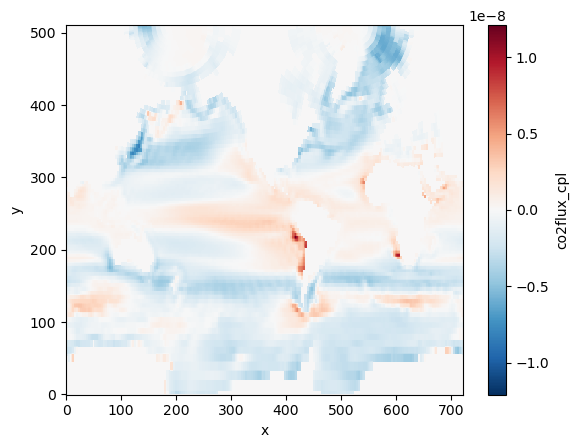

In [27]:
data.co2flux_cpl.mean(dim=('time_counter')).plot()

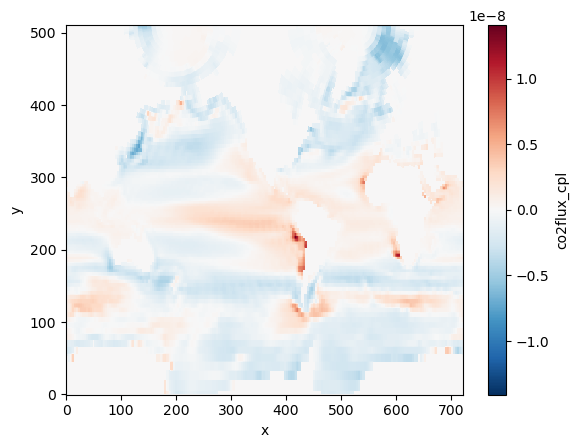

In [28]:
ds_date_range.co2flux_cpl.mean(dim=('time_counter')).plot()

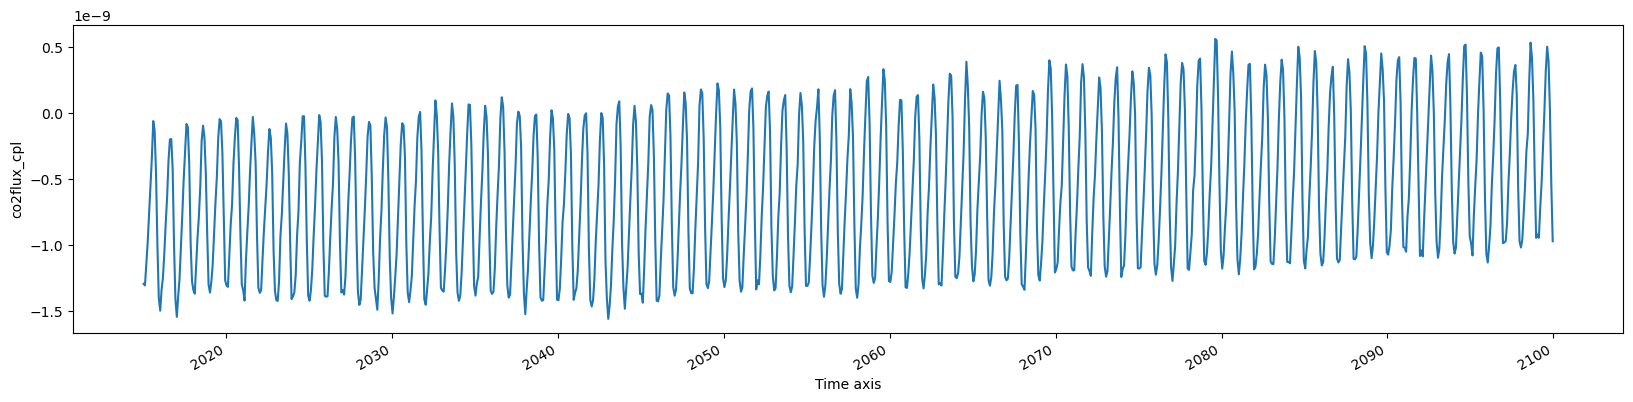

In [29]:
data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean

In [30]:
sliced_data = data.where((-40 < data.nav_lon) & (data.nav_lon < 40) & (20 < data.nav_lat) & (data.nav_lat < 80), drop=True)

# https://stackoverflow.com/questions/41818927/how-to-subset-data-using-multidimensional-coordinates-using-python-xarr

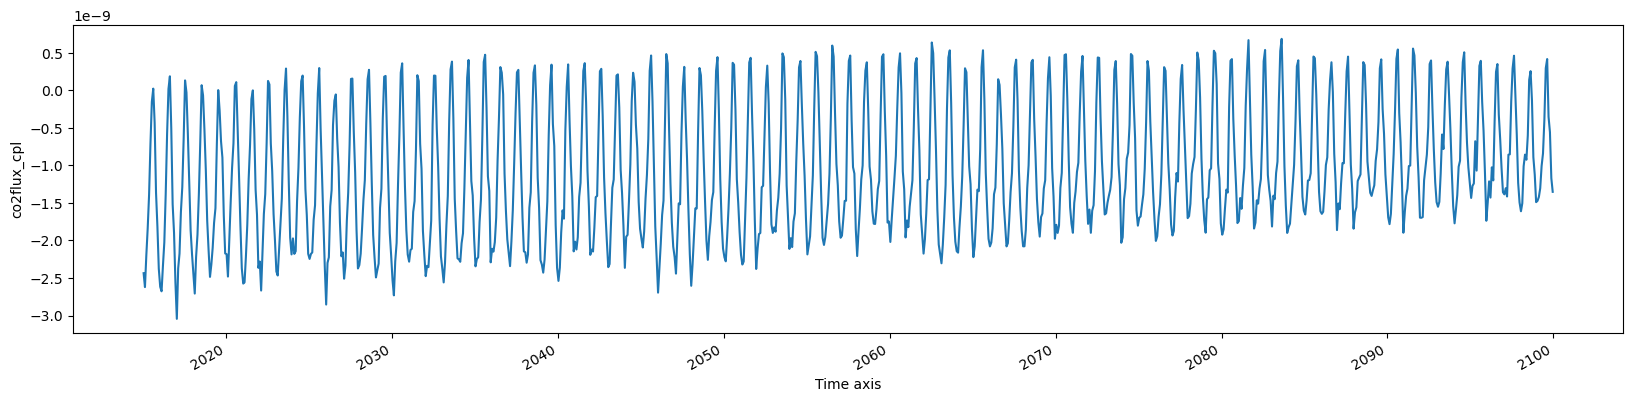

In [31]:
sliced_data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # regional mean with OAE

In [33]:
df_sliced = sliced_data.to_dataframe() # export data as Pandas dataframe 

Text(0.5, 1.02, 'CO2 flux')

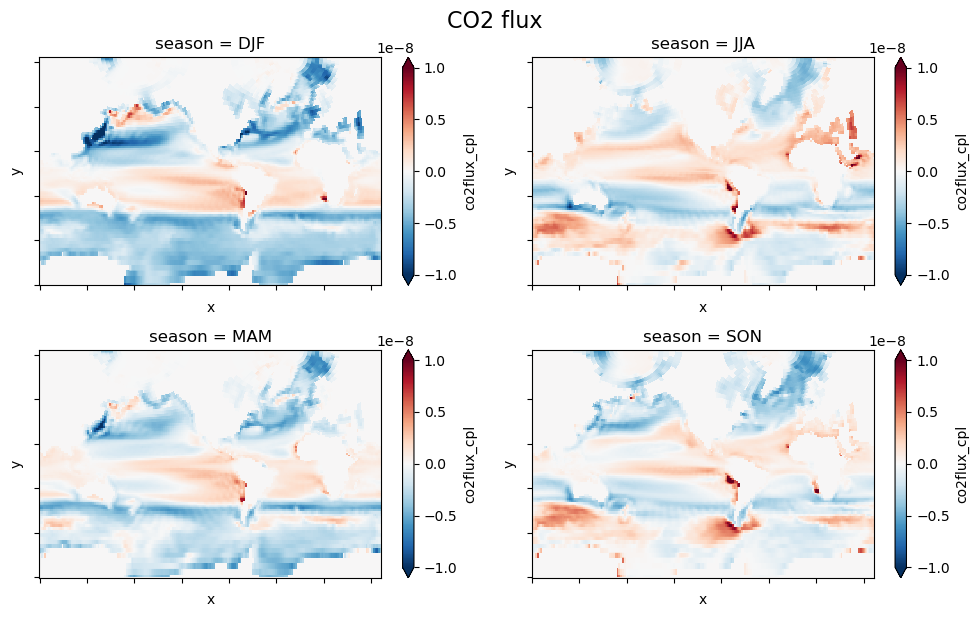

In [59]:
ds_season = data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 flux', fontsize=16, y=1.02)

Text(0.5, 1.02, 'CO2 flux')

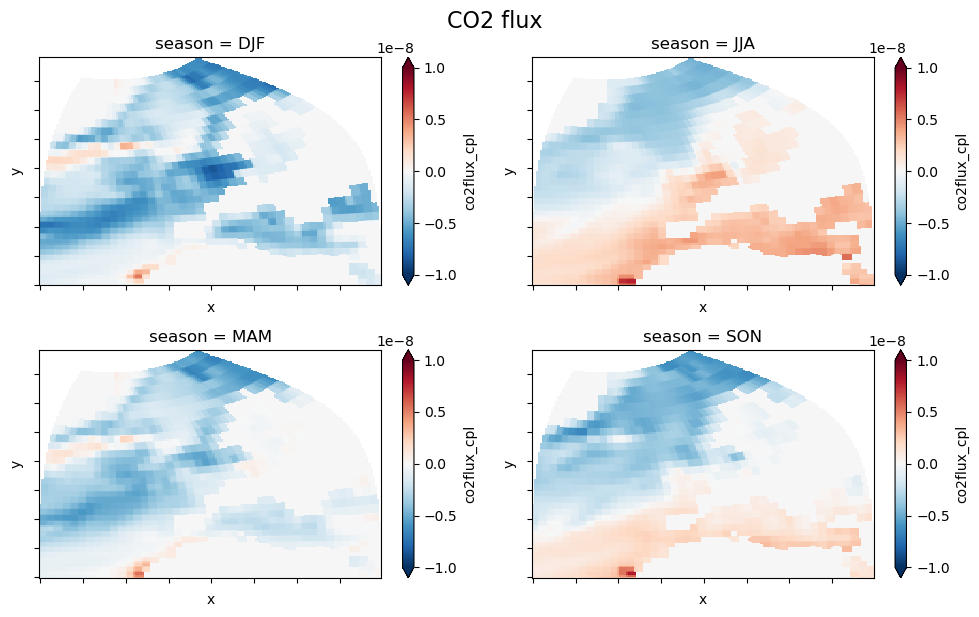

In [60]:
ds_season = sliced_data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 flux', fontsize=16, y=1.02)

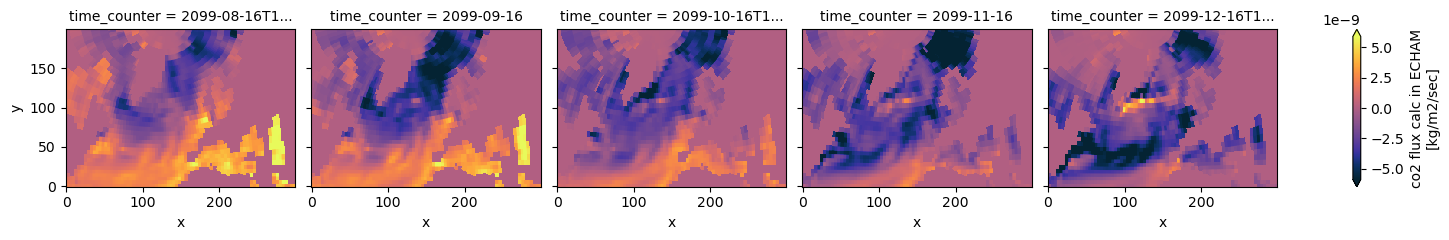

In [37]:
# last seven days of the simulation

ds = '/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc'

cmap = cmocean.cm.thermal
with xr.open_dataset(ds) as xadf:
    pd = xadf.isel(time_counter=slice(-5,None), y=slice(300, 500), x=slice(400, 700)) #last seven days
    facet = pd['co2flux_cpl'].plot(x='x', y='y', col='time_counter',col_wrap=5,robust=True,figsize=(16,2.5),cmap=cmap)

In [38]:
# divide the dataframe by seasons

ds_weighted = data.groupby('time_counter.season').mean('time_counter')
ds_weighted 

<xarray.Dataset>
Dimensions:      (y: 511, x: 722, season: 4)
Coordinates:
    nav_lat      (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.07 50.0 50.0
    nav_lon      (y, x) float32 72.75 73.25 73.75 74.25 ... 73.01 73.0 73.0
  * season       (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: y, x
Data variables:
    co2flux_cpl  (season, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [68]:
start_date = "2020-01-01"
end_date = "2100-01-01"

co2_flux = sliced_data["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [69]:
co2flux_season_summary = co2_flux.groupby('time_counter.season').mean('time_counter', skipna=True)

In [70]:
co2flux_season_mean_all_years = co2_flux.resample(time_counter='QS-DEC', keep_attrs=True).mean()

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [71]:
co2flux_seasonal_mean = co2flux_season_mean_all_years.groupby('time_counter').mean(["y", "x"])

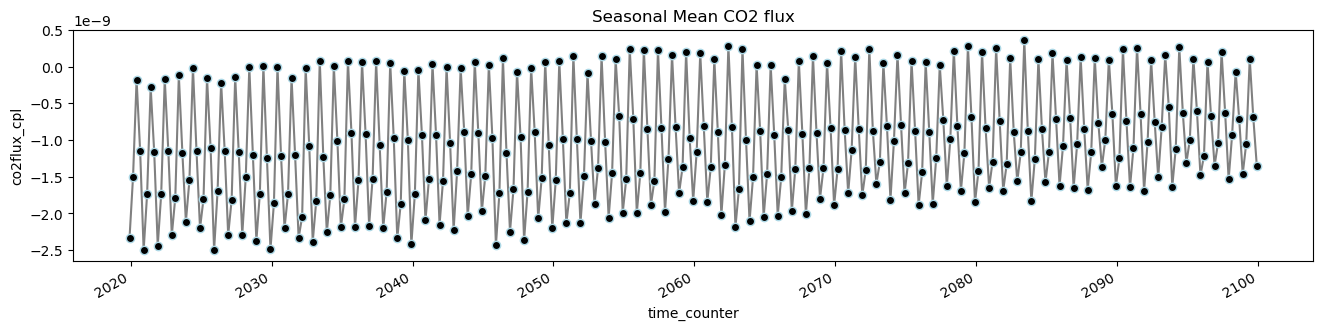

In [75]:
f, ax = plt.subplots(figsize=(16, 3))
co2flux_seasonal_mean.plot(marker="o",
                        color="grey",
                        markerfacecolor="black",
                        markeredgecolor="lightblue")
ax.set(title="Seasonal Mean CO2 flux")
plt.show()

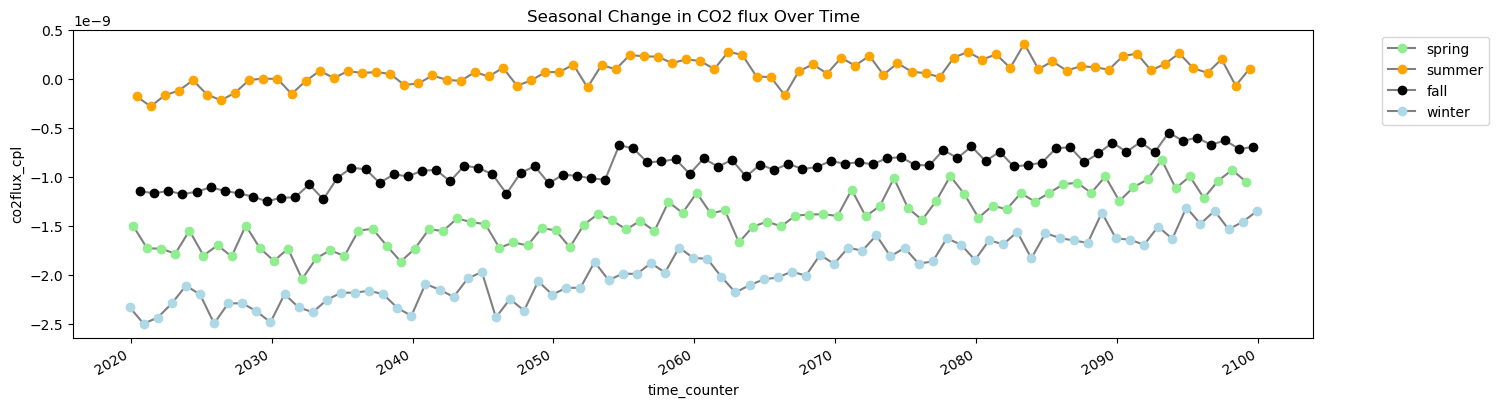

In [78]:
colors = {3: "lightgreen", 6: "orange", 9: "black", 12: "lightblue"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in co2flux_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="grey",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor=colors[month],
             label=seasons[month])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(title="Seasonal Change in CO2 flux Over Time")
plt.show()